In [10]:
import pandas as pd
import numpy as np
from collections import Counter

In [11]:
dataset = []
with open("/content/drive/MyDrive/CSE477 Project/kosarak.dat") as f:
  for line in f:
    dataline = [int(i) for i in line.split(' ')[:-1]] ## Due to the last position having \n
    dataset.append(dataline)

In [12]:
from mlxtend.preprocessing import TransactionEncoder
transactionencoder = TransactionEncoder()
arr = transactionencoder.fit_transform(dataset, sparse = True)
df = pd.DataFrame.sparse.from_spmatrix(data=arr, columns=[str(i) for i in transactionencoder.columns_]) ## After fit_transform, the transactionencoder automatically generates the columns

In [13]:
##https://stackoverflow.com/questions/51528769/how-to-implement-fpgrowth-algorithm-in-python

In [14]:
from mlxtend.frequent_patterns import apriori
import time 
apriori_time = {}
for i in range(5, 100, 5):
    print(i)
    start = time.time()
    value = apriori(df, min_support=(i/100), low_memory=True, use_colnames=True)
    end = time.time()
    exc_time = end-start
    apriori_time[i] = exc_time
print(apriori_time)

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
{5: 3.1628057956695557, 10: 1.3337912559509277, 15: 1.2576508522033691, 20: 1.255068302154541, 25: 1.1911866664886475, 30: 1.1658151149749756, 35: 1.143167495727539, 40: 1.1198680400848389, 45: 1.118591547012329, 50: 1.1075084209442139, 55: 1.1021857261657715, 60: 1.0718603134155273, 65: 1.0819876194000244, 70: 1.0786056518554688, 75: 1.0814385414123535, 80: 1.0837609767913818, 85: 1.0822370052337646, 90: 1.0828063488006592, 95: 1.0860795974731445}


In [15]:
from mlxtend.frequent_patterns import fpgrowth
import time 
fpgrowth_time = {}
for i in range(5, 100, 5):
    print(i)
    start = time.time()
    fpgrowth_val = fpgrowth(df, min_support=(i/100), use_colnames = True )
    end = time.time()
    exc_time = end-start
    fpgrowth_time[i] = exc_time

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


# This is used just for analysis purposes
counter = Counter([j for i in range(len(dataset)) for j in dataset[i]]) <br/>
counter.most_common()

# It is used to upgrade mlxtend
%pip install mlxtend --upgrade

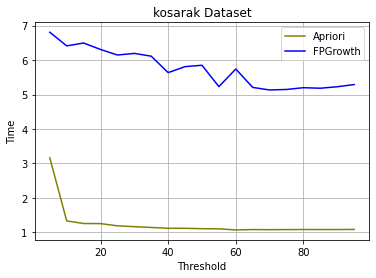

In [16]:
import matplotlib.pyplot as plt
x, y1, y2 = [i for i in apriori_time.keys()], [i for i in apriori_time.values()], [i for i in fpgrowth_time.values()]
plt.plot(x, y1, label='Apriori', color = 'olive')
plt.plot(x, y2, label = 'FPGrowth', color= 'blue')
plt.grid(True)
plt.xlabel("Threshold")
plt.ylabel("Time")
plt.title("kosarak Dataset")
plt.legend()
plt.savefig('/content/drive/MyDrive/CSE477 Project/kosarak.png', dpi = 300)
plt.show()


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
%pip install mlxtend --upgrade

Requirement already up-to-date: mlxtend in /usr/local/lib/python3.7/dist-packages (0.18.0)
